# IPL 2023 Scraping

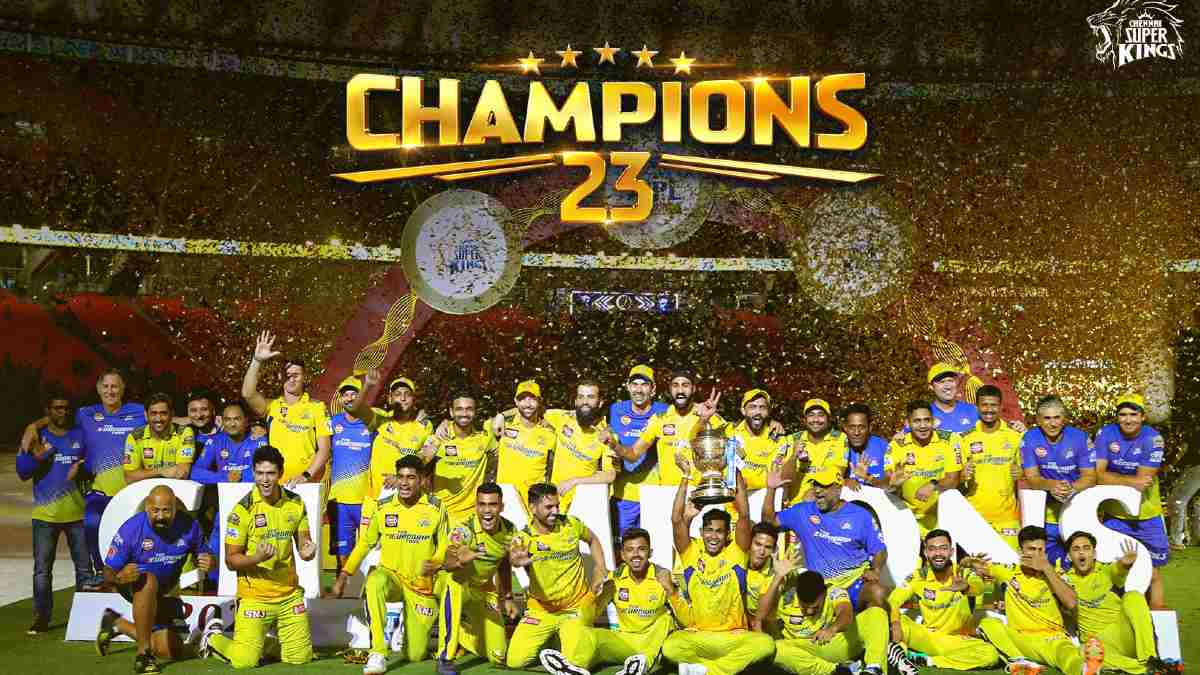

In [ ]:
import requests
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen
import pandas as pd
import logging
logging.basicConfig(filename="error_ipl_2023.log", level=logging.INFO)

In [ ]:
url = 'https://www.espncricinfo.com/series/indian-premier-league-2023-1345038/match-schedule-fixtures-and-results'

In [ ]:
urlclient = urlopen(url)

In [ ]:
page = urlclient.read()

In [ ]:
page_html = bs(page, 'html.parser')

In [ ]:
# df = pd.read_html(page)

In [ ]:
# df = df[0]

In [ ]:
bigbox = page_html.findAll("div", {"class": "ds-grow ds-px-4 ds-border-r ds-border-line-default-translucent"})

In [ ]:
bigbox

In [ ]:
matchlink = []
# count =1
for i in bigbox:
    # print(count,'https://www.espncricinfo.com'+i.a['href'])
    matchlink.append('https://www.espncricinfo.com'+(i.a['href']))
    # count+=1

In [ ]:
len(matchlink)

## Scraping Batting Data


In [ ]:
df_batting = pd.DataFrame(columns=['match', 'teamInnings', 'battingPos',
                          'batsmanName', 'runs', 'balls', '4s', '6s', 'SR', 'out/not_out','match_id'])

In [ ]:
matchlink

#### Below code is for 1st match only.

In [ ]:
count = int(0)
for i in range(1):
    try:
        urln = matchlink[0]
        urlclient = urlopen(urln)
        page = urlclient.read()
        page_htmln = bs(page, 'html.parser')

        # 1st Innings
        page_html_bat_in1 = page_htmln.findAll(
            "table", {"class": "ds-w-full"})[0].findAll("td", {"class": "ds-items-center"})
        del page_html_bat_in1[-1]
        for j in range(len(page_html_bat_in1)):

            # battingPos
            df_batting.loc[count, 'battingPos'] = j+1

            # batsmanName
            df_batting.loc[count,
                           'batsmanName'] = page_html_bat_in1[j].a['title']

            # match
            match_countries = page_htmln.findAll("span", {
                                                 "class": "ds-text-tight-l ds-font-bold ds-text-typo hover:ds-text-typo-primary ds-block ds-truncate"})
            match_str = match_countries[0].text + \
                (" Vs ") + match_countries[1].text
            df_batting.loc[count, 'match'] = (match_str)

            # teamInnings
            df_batting.loc[count, 'teamInnings'] = (page_htmln.find(
                "span", {"class": "ds-text-title-xs ds-font-bold ds-capitalize"}).text)

            # # match_id
            df_batting.loc[count, 'match_id'] = 'I23M'+str(i+1)


            # runs
            df_batting.loc[count, 'runs'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[6*j-j].text)

            # balls
            df_batting.loc[count, 'balls'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[6*j+1-j].text)

            # 4s
            df_batting.loc[count, '4s'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[6*j+2-j].text)

            # 6s
            df_batting.loc[count, '6s'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[6*j+3-j].text)

            # SR
            df_batting.loc[count, 'SR'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[6*j+4-j].text)

            # out/not_out
            ot = page_htmln.findAll("table", {"class": "ds-w-full"})[0].findAll(
                "td", {"class": "ds-min-w-max !ds-pl-[100px]"})[j].text
            if (ot == 'not out '):
                df_batting.loc[count, 'out/not_out'] = 'not_out'
            else:
                df_batting.loc[count, 'out/not_out'] = 'out'

            count += 1

        # 2nd Inning
        page_html_bat_in2 = page_htmln.findAll(
            "table", {"class": "ds-w-full"})[2].findAll("td", {"class": "ds-items-center"})
        del page_html_bat_in2[-1]
        for j in range(len(page_html_bat_in2)):

            # battingPos
            df_batting.loc[count, 'battingPos'] = j+1

            # batsmanName
            df_batting.loc[count,
                           'batsmanName'] = page_html_bat_in2[j].a['title']

            # match
            match_countries = page_htmln.findAll("span", {
                                                 "class": "ds-text-tight-l ds-font-bold ds-text-typo hover:ds-text-typo-primary ds-block ds-truncate"})
            match_str = match_countries[0].text + \
                (" Vs ") + match_countries[1].text
            df_batting.loc[count, 'match'] = (match_str)

            # teamInnings
            df_batting.loc[count, 'teamInnings'] = page_htmln.findAll(
                "span", {"class": "ds-text-title-xs ds-font-bold ds-capitalize"})[1].text

            # # match_id
            # df_batting.loc[count, 'match_id'] = df['Scorecard'][i]
            df_batting.loc[count, 'match_id'] = 'I23M'+str(i+1)
            

            lp = len(page_html_bat_in1)
            lb = len(page_htmln.findAll(
                "table", {"class": "ds-w-full"})[1].findAll("td", {"ds-flex ds-items-center"}))
            l = 6*lp+9*lb - len(page_html_bat_in1) - j
            # 6 * no of plyers in last innings(lp)
            # 9 * no of ballers in last innings(lb)

            # runs
            df_batting.loc[count, 'runs'] = page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[l+6*j].text

            # balls
            # l = 6*lp+9*lb+1
            df_batting.loc[count, 'balls'] = page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[l+6*j+1].text

            # 4s
            # l = 6*lp+9*lb+3
            df_batting.loc[count, '4s'] = page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[l+6*j+2].text

            # 6s
            # l = 6*lp+9*lb+4
            df_batting.loc[count, '6s'] = page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[l+6*j+3].text

            # SR
            # l = 6*lp+9*lb+5
            df_batting.loc[count, 'SR'] = page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[l+6*j+4].text

            # oudf/not_out
            ot = page_htmln.findAll("table", {"class": "ds-w-full"})[2].findAll(
                "td", {"class": "ds-min-w-max !ds-pl-[100px]"})[j].text
            if (ot == 'not out '):
                df_batting.loc[count, 'out/not_out'] = 'not_out'
            else:
                df_batting.loc[count, 'out/not_out'] = 'out'

            count += 1

    except Exception as e:
        logging.info(e)

#### Below code is for 2nd match onwards.

In [ ]:
for i in range(1,len(matchlink)):
    try:
        urln = matchlink[i]
        urlclient = urlopen(urln)
        page = urlclient.read()
        page_htmln = bs(page, 'html.parser')

        # 1st Innings
        page_html_bat_in1 = page_htmln.findAll(
            "table", {"class": "ds-w-full"})[0].findAll("td", {"class": "ds-items-center"})
        del page_html_bat_in1[-1]
        for j in range(len(page_html_bat_in1)):
            # j += 1

            # battingPos
            df_batting.loc[count, 'battingPos'] = j+1

            # batsmanName
            df_batting.loc[count,
                           'batsmanName'] = page_html_bat_in1[j].a['title']

            # match
            match_countries = page_htmln.findAll("span", {
                                                 "class": "ds-text-tight-l ds-font-bold ds-text-typo hover:ds-text-typo-primary ds-block ds-truncate"})
            match_str = match_countries[0].text + \
                (" Vs ") + match_countries[1].text
            df_batting.loc[count, 'match'] = (match_str)

            # teamInnings
            df_batting.loc[count, 'teamInnings'] = (page_htmln.find(
                "span", {"class": "ds-text-title-xs ds-font-bold ds-capitalize"}).text)

            # # match_id
            df_batting.loc[count, 'match_id'] = 'I23M'+str(i+1)
            
            
            pos = 6*j
            
            # runs
            df_batting.loc[count, 'runs'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[pos].text)

            # balls
            df_batting.loc[count, 'balls'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[pos+1].text)

            # 4s
            df_batting.loc[count, '4s'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[pos+2+1].text)

            # 6s
            df_batting.loc[count, '6s'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[pos+3+1].text)

            # SR
            df_batting.loc[count, 'SR'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[pos+4+1].text)

            # out/not_out
            ot = page_htmln.findAll("table", {"class": "ds-w-full"})[0].findAll(
                "td", {"class": "ds-min-w-max !ds-pl-[100px]"})[j].text
            if (ot == 'not out '):
                df_batting.loc[count, 'out/not_out'] = 'not_out'
            else:
                df_batting.loc[count, 'out/not_out'] = 'out'

            count += 1

        # 2nd Inning
        page_html_bat_in2 = page_htmln.findAll(
            "table", {"class": "ds-w-full"})[2].findAll("td", {"class": "ds-items-center"})
        del page_html_bat_in2[-1]
        for j in range(len(page_html_bat_in2)):
            # j += 1

            # battingPos
            df_batting.loc[count, 'battingPos'] = j+1

            # batsmanName
            df_batting.loc[count,
                           'batsmanName'] = page_html_bat_in2[j].a['title']

            # match
            match_countries = page_htmln.findAll("span", {
                                                 "class": "ds-text-tight-l ds-font-bold ds-text-typo hover:ds-text-typo-primary ds-block ds-truncate"})
            match_str = match_countries[0].text + \
                (" Vs ") + match_countries[1].text
            df_batting.loc[count, 'match'] = (match_str)

            # teamInnings
            df_batting.loc[count, 'teamInnings'] = page_htmln.findAll(
                "span", {"class": "ds-text-title-xs ds-font-bold ds-capitalize"})[1].text

            # # match_id
            # df_batting.loc[count, 'match_id'] = df['Scorecard'][i]
            df_batting.loc[count, 'match_id'] = 'I23M'+str(i+1)
            

            lp = len(page_html_bat_in1)
            lb = len(page_htmln.findAll(
                "table", {"class": "ds-w-full"})[1].findAll("td", {"ds-flex ds-items-center"}))
            l = 6*lp+9*lb
            # l = 6*lp+9*lb - len(page_html_bat_in1) - j
            # 6 * no of plyers in last innings(lp)
            # 9 * no of ballers in last innings(lb)

            # runs
            df_batting.loc[count, 'runs'] = page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[l+6*j].text

            # balls
            # l = 6*lp+9*lb+1
            df_batting.loc[count, 'balls'] = page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[l+6*j+1].text

            # 4s
            # l = 6*lp+9*lb+3
            df_batting.loc[count, '4s'] = page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[l+6*j+2+1].text

            # 6s
            # l = 6*lp+9*lb+4
            df_batting.loc[count, '6s'] = page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[l+6*j+3+1].text

            # SR
            # l = 6*lp+9*lb+5
            df_batting.loc[count, 'SR'] = page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[l+6*j+4+1].text

            # oudf/not_out
            ot = page_htmln.findAll("table", {"class": "ds-w-full"})[2].findAll(
                "td", {"class": "ds-min-w-max !ds-pl-[100px]"})[j].text
            if (ot == 'not out '):
                df_batting.loc[count, 'out/not_out'] = 'not_out'
            else:
                df_batting.loc[count, 'out/not_out'] = 'out'

            count += 1

    except Exception as e:
        logging.info(e)

In [ ]:
df_batting.shape

In [ ]:
df_batting.to_csv("Batting_PerMatchData_IPL_2023.csv", index=False)

## Scraping Bowling Data


In [ ]:
df_bowling = pd.DataFrame(columns=['match', 'bowlingTeam', 'bowlerName', 'overs',
                          'maiden', 'runs', 'wickets', 'economy', '0s', '4s', '6s', 'wides', 'noBalls','match_id'])

#### Below code is for 1st match only.

In [ ]:
count = int(0)
for i in range(1):
    try:
        urln = matchlink[i]
        urlclient = urlopen(urln)
        page = urlclient.read()
        page_htmln = bs(page, 'html.parser')

        # 1st Innings
        page_html_bat_in1 = page_htmln.findAll(
            "table", {"class": "ds-w-full"})[0].findAll("td", {"class": "ds-items-center"})
        page_html_bowl_in1 = page_htmln.findAll(
            "table", {"class": "ds-w-full"})[1].findAll("td", {"class": "ds-items-center"})
        del page_html_bat_in1[-1]
        for j in range(len(page_html_bowl_in1)):

            # df_bowling.loc[count,'bowlingPos']=j+1
            df_bowling.loc[count, 'bowlerName'] = page_html_bowl_in1[j].text

            # match
            match_countries = page_htmln.findAll("span", {
                                                 "class": "ds-text-tight-l ds-font-bold ds-text-typo hover:ds-text-typo-primary ds-block ds-truncate"})
            match_str = match_countries[0].text + \
                (" Vs ") + match_countries[1].text
            df_bowling.loc[count, 'match'] = (match_str)

            # bowlingTeam
            df_bowling.loc[count, 'bowlingTeam'] = match_countries[1].text

            # # match_id
            df_bowling.loc[count, 'match_id'] = 'I23M'+str(i+1)

            lp = 5 * len(page_html_bat_in1)
            # 6 * no of plyers in last innings(lp)

            # overs
            df_bowling.loc[count, 'overs'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[lp + 9*j].text)

            # maiden
            df_bowling.loc[count, 'maiden'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[lp + 9*j+1].text)

            # runs
            df_bowling.loc[count, 'runs'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[lp + 9*j+2].text)

            # economy
            df_bowling.loc[count, 'economy'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[lp + 9*j+3].text)

            # 0s
            df_bowling.loc[count, '0s'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[lp + 9*j+4].text)

            # 4s
            df_bowling.loc[count, '4s'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[lp + 9*j+5].text)

            # 6s
            df_bowling.loc[count, '6s'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[lp + 9*j+6].text)

            # wides
            df_bowling.loc[count, 'wides'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[lp + 9*j+7].text)

            # noBalls
            df_bowling.loc[count, 'noBalls'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[lp + 9*j+8].text)

            # wickets
            df_bowling.loc[count, 'wickets'] = (page_htmln.findAll("table", {"class": "ds-w-full ds-table ds-table-md ds-table-auto"})[
                                                0].findAll("td", {"class": "ds-w-0 ds-whitespace-nowrap ds-text-right"}))[j].text

            count += 1

        # 2nd Inning
        page_html_bat_in2 = page_htmln.findAll(
            "table", {"class": "ds-w-full"})[2].findAll("td", {"class": "ds-items-center"})
        del page_html_bat_in2[-1]
        page_html_bowl_in2 = page_htmln.findAll(
            "table", {"class": "ds-w-full"})[3].findAll("td", {"class": "ds-items-center"})
        # del page_html_bowl_in2[-1]
        for j in range(len(page_html_bowl_in2)):

            # bowlerName
            df_bowling.loc[count, 'bowlerName'] = page_html_bowl_in2[j].text

            # match
            match_countries = page_htmln.findAll("span", {
                                                 "class": "ds-text-tight-l ds-font-bold ds-text-typo hover:ds-text-typo-primary ds-block ds-truncate"})
            match_str = match_countries[0].text + \
                (" Vs ") + match_countries[1].text
            df_bowling.loc[count, 'match'] = (match_str)

            # bowlingTeam
            df_bowling.loc[count, 'bowlingTeam'] = match_countries[0].text

            # # match_id
            df_bowling.loc[count, 'match_id'] = 'I23M'+str(i+1)
            

            lp2 = 5 * len(page_html_bat_in2)
            lb = 9*len(page_html_bowl_in1)
            l = lp + lb + lp2 
            # 9 * no of ballers in last innings(lb)

            # overs
            df_bowling.loc[count, 'overs'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[l+9*j].text)

            # maiden
            df_bowling.loc[count, 'maiden'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[l + 9*j+1].text)

            # runs
            df_bowling.loc[count, 'runs'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[l + 9*j+2].text)

            # economy
            df_bowling.loc[count, 'economy'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[l + 9*j+3].text)

            # 0s
            df_bowling.loc[count, '0s'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[l + 9*j+4].text)

            # 4s
            df_bowling.loc[count, '4s'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[l + 9*j+5].text)

            # 6s
            df_bowling.loc[count, '6s'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[l + 9*j+6].text)

            # wides
            df_bowling.loc[count, 'wides'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[l + 9*j+7].text)

            # noBalls
            df_bowling.loc[count, 'noBalls'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[l + 9*j+8].text)

            # wickets
            df_bowling.loc[count, 'wickets'] = (page_htmln.findAll("table", {"class": "ds-w-full ds-table ds-table-md ds-table-auto"})[
                                                1].findAll("td", {"class": "ds-w-0 ds-whitespace-nowrap ds-text-right"}))[j].text

            count += 1

    except Exception as e:
        logging.info(e)

#### Below code is for 2nd match onwards.

In [ ]:
for i in range(1,len(matchlink)):
    try:
        urln = matchlink[i]
        urlclient = urlopen(urln)
        page = urlclient.read()
        page_htmln = bs(page, 'html.parser')

        # 1st Innings
        page_html_bat_in1 = page_htmln.findAll(
            "table", {"class": "ds-w-full"})[0].findAll("td", {"class": "ds-items-center"})
        page_html_bowl_in1 = page_htmln.findAll(
            "table", {"class": "ds-w-full"})[1].findAll("td", {"class": "ds-items-center"})
        del page_html_bat_in1[-1]
        for j in range(len(page_html_bowl_in1)):

            df_bowling.loc[count, 'bowlerName'] = page_html_bowl_in1[j].text

            # match
            match_countries = page_htmln.findAll("span", {
                                                 "class": "ds-text-tight-l ds-font-bold ds-text-typo hover:ds-text-typo-primary ds-block ds-truncate"})
            match_str = match_countries[0].text + \
                (" Vs ") + match_countries[1].text
            df_bowling.loc[count, 'match'] = (match_str)

            # bowlingTeam
            df_bowling.loc[count, 'bowlingTeam'] = match_countries[1].text

            # # match_id
            df_bowling.loc[count, 'match_id'] = 'I23M'+str(i+1)

            lp = 6 * len(page_html_bat_in1)
            # 6 * no of plyers in last innings(lp)

            # overs
            df_bowling.loc[count, 'overs'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[lp + 9*j].text)

            # maiden
            df_bowling.loc[count, 'maiden'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[lp + 9*j+1].text)

            # runs
            df_bowling.loc[count, 'runs'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[lp + 9*j+2].text)

            # economy
            df_bowling.loc[count, 'economy'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[lp + 9*j+3].text)

            # 0s
            df_bowling.loc[count, '0s'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[lp + 9*j+4].text)

            # 4s
            df_bowling.loc[count, '4s'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[lp + 9*j+5].text)

            # 6s
            df_bowling.loc[count, '6s'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[lp + 9*j+6].text)

            # wides
            df_bowling.loc[count, 'wides'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[lp + 9*j+7].text)

            # noBalls
            df_bowling.loc[count, 'noBalls'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[lp + 9*j+8].text)

            # wickets
            df_bowling.loc[count, 'wickets'] = (page_htmln.findAll("table", {"class": "ds-w-full ds-table ds-table-md ds-table-auto"})[
                                                0].findAll("td", {"class": "ds-w-0 ds-whitespace-nowrap ds-text-right"}))[j].text

            count += 1

        # 2nd Inning
        page_html_bat_in2 = page_htmln.findAll(
            "table", {"class": "ds-w-full"})[2].findAll("td", {"class": "ds-items-center"})
        del page_html_bat_in2[-1]
        page_html_bowl_in2 = page_htmln.findAll(
            "table", {"class": "ds-w-full"})[3].findAll("td", {"class": "ds-items-center"})
        # del page_html_bowl_in2[-1]
        for j in range(len(page_html_bowl_in2)):

            # bowlerName
            df_bowling.loc[count, 'bowlerName'] = page_html_bowl_in2[j].text

            # match
            match_countries = page_htmln.findAll("span", {
                                                 "class": "ds-text-tight-l ds-font-bold ds-text-typo hover:ds-text-typo-primary ds-block ds-truncate"})
            match_str = match_countries[0].text + \
                (" Vs ") + match_countries[1].text
            df_bowling.loc[count, 'match'] = (match_str)

            # bowlingTeam
            df_bowling.loc[count, 'bowlingTeam'] = match_countries[0].text

            # # match_id
            # df_bowling.loc[count, 'match_id'] = df['Scorecard'][i]
            df_bowling.loc[count, 'match_id'] = 'I23M'+str(i+1)
            

            lp2 = 6 * len(page_html_bat_in2)
            lb = 9*len(page_html_bowl_in1)
            l = lp + lb + lp2
            # 9 * no of ballers in last innings(lb)

            # overs
            df_bowling.loc[count, 'overs'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[l+9*j].text)

            # maiden
            df_bowling.loc[count, 'maiden'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[l + 9*j+1].text)

            # runs
            df_bowling.loc[count, 'runs'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[l + 9*j+2].text)

            # economy
            df_bowling.loc[count, 'economy'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[l + 9*j+3].text)

            # 0s
            df_bowling.loc[count, '0s'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[l + 9*j+4].text)

            # 4s
            df_bowling.loc[count, '4s'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[l + 9*j+5].text)

            # 6s
            df_bowling.loc[count, '6s'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[l + 9*j+6].text)

            # wides
            df_bowling.loc[count, 'wides'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[l + 9*j+7].text)

            # noBalls
            df_bowling.loc[count, 'noBalls'] = (page_htmln.findAll(
                "td", {"class": "ds-w-0 ds-whitespace-nowrap ds-min-w-max ds-text-right"})[l + 9*j+8].text)

            # wickets
            df_bowling.loc[count, 'wickets'] = (page_htmln.findAll("table", {"class": "ds-w-full ds-table ds-table-md ds-table-auto"})[
                                                1].findAll("td", {"class": "ds-w-0 ds-whitespace-nowrap ds-text-right"}))[j].text

            count += 1

    except Exception as e:
        logging.info(e)

In [ ]:
df_bowling.shape

In [ ]:
df_bowling.to_csv("Bowling_PerMatchData_IPL_2023.csv", index=False)